In [44]:
import pandas as pd 
from matplotlib import pyplot as plt

In [4]:
ent_df = pd.read_csv('ent.csv')
punc_df = pd.read_csv('punctuation.csv')
pos_df = pd.read_csv('pos_tag.csv')

In [9]:
def split_target(df):
	return df[df['target'] == 1], df[df['target'] == 0]

In [10]:
def create_count_df_dict(pos_df, neg_df, normalize=True):
	result = {}
	for label in pos_df.columns:
		if label != 'target':
			count_df =  pd.DataFrame(data={
				'positive': pd.Series(pos_df[label]).value_counts(normalize=normalize), 
				'negative': pd.Series(neg_df[label]).value_counts(normalize=normalize)
				})
			result[label] = count_df
	return result

In [11]:
def create_value_df_dict(pos_df, neg_df, normalize=True):
	result = {}
	for label in pos_df.columns:
		if label != 'target':
			values={
				'positive': list(pos_df[label].values), 
				'negative': list(neg_df[label].values)}
			result[label] = values
	return result

In [98]:
def corpus_level_plot(df_dict, kind):
    for key in df_dict:
        if kind == 'bar':
            figure, ax = plt.subplots(figsize=(8, 3))
            title = 'Bar plot for '+key+ ' counts at corpus level'
            ax.set_title(title)

            curr_df = df_dict[key]
            title = kind + ' plot for ' + key
            curr_df.plot(kind=kind, title=title, legend=True, ax=ax)
            ax.set_xlim(-1, 10)

In [70]:
df_list = [ent_df, punc_df, pos_df]
labels_list = [df.columns for df in df_list]
splitted_dfs = [split_target(df) for df in df_list]

normalized_count_dicts = [create_count_df_dict(dfs[0], dfs[1]) for dfs in splitted_dfs]
value_dicts = [create_value_df_dict(dfs[0], dfs[1]) for dfs in splitted_dfs]

### Plots for named entities

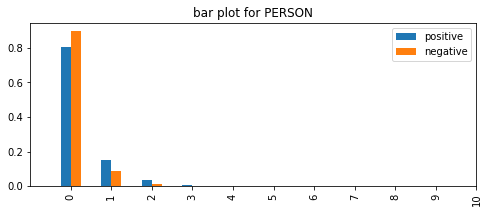

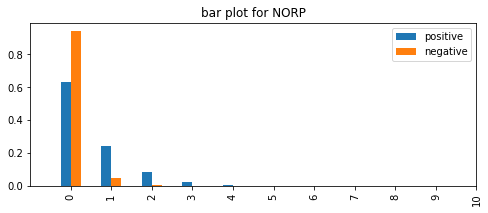

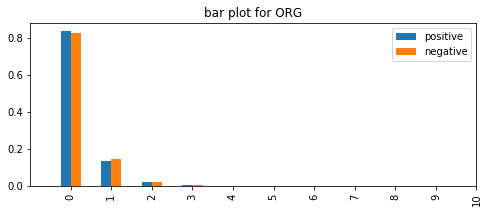

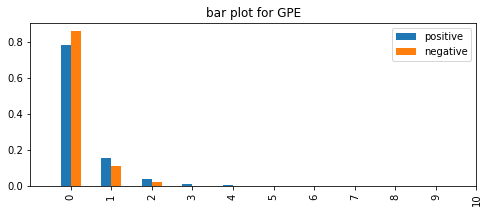

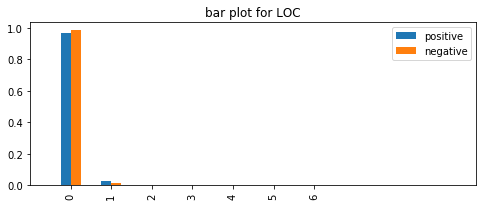

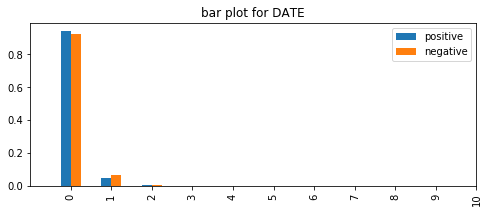

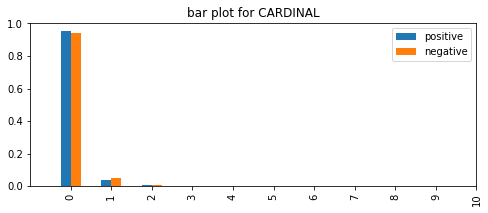

In [99]:
corpus_level_plot(normalized_count_dicts[0], 'bar')

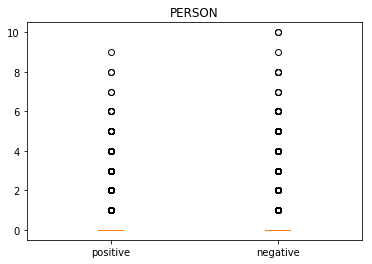

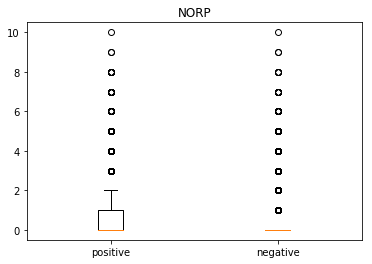

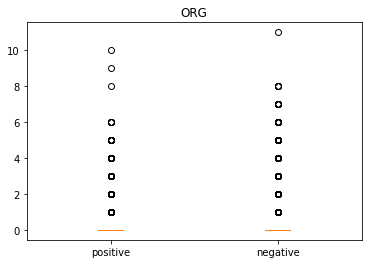

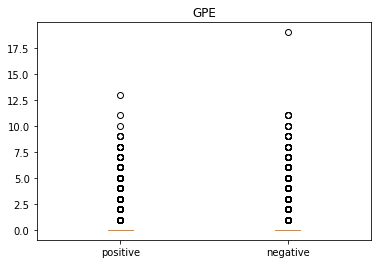

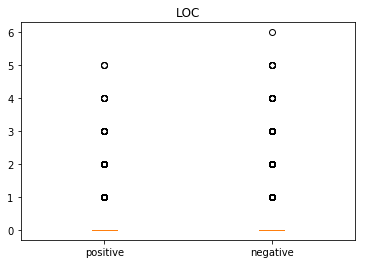

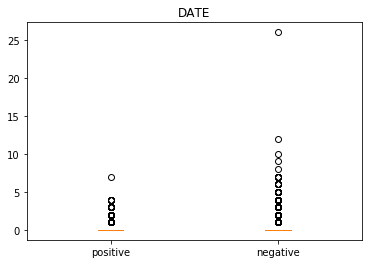

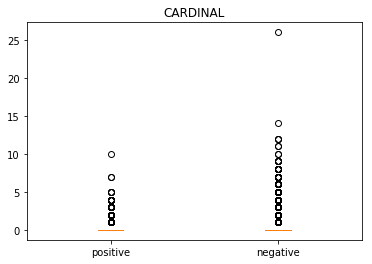

In [109]:
values = value_dicts[0]
for key in values:
    figure, ax = plt.subplots()
    labels, data = values[key].keys(), values[key].values()
    ax.boxplot(data, labels=labels)
    ax.set_title(key)

### Plots for punctuation marks

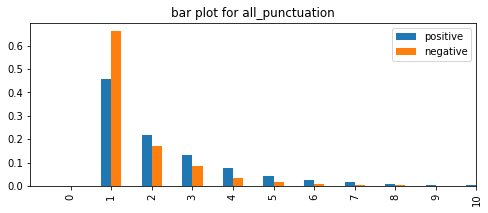

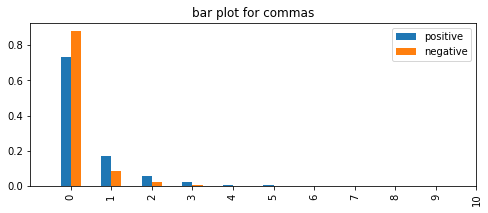

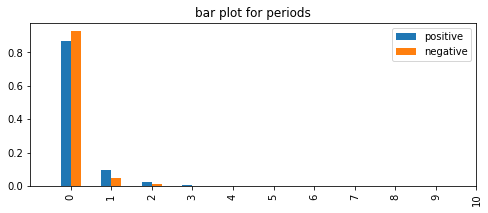

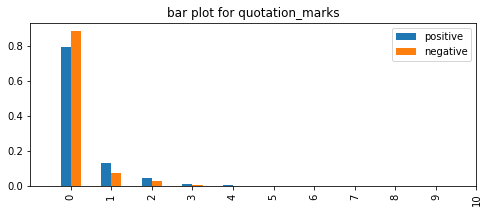

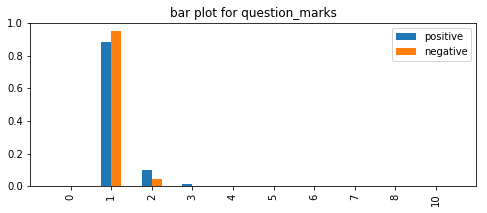

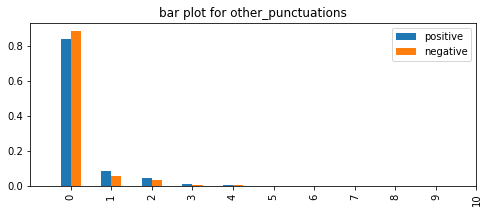

In [100]:
corpus_level_plot(normalized_count_dicts[1], 'bar')

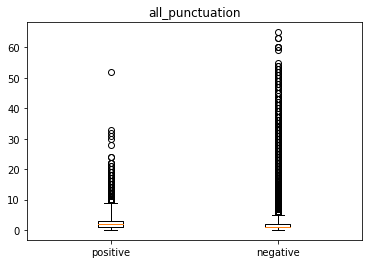

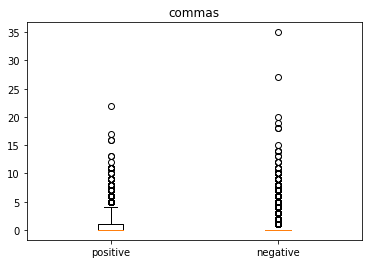

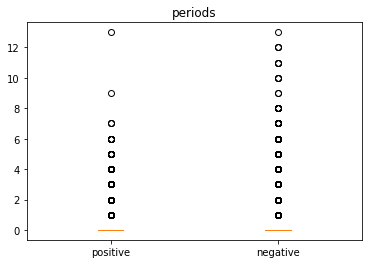

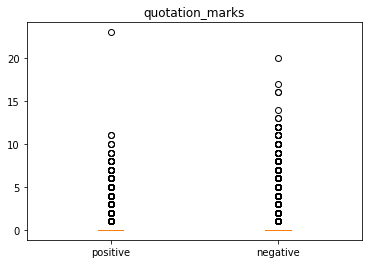

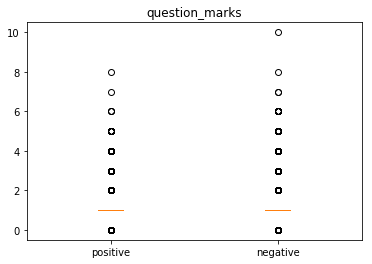

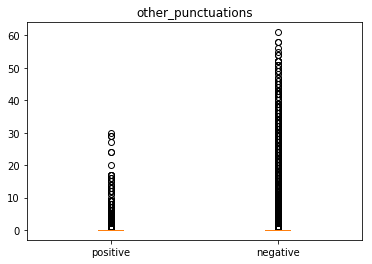

In [107]:
values = value_dicts[1]
for key in values:
    figure, ax = plt.subplots()
    labels, data = values[key].keys(), values[key].values()
    ax.boxplot(data, labels=labels, whis=3)
    ax.set_title(key)

### Plots for parts of speech

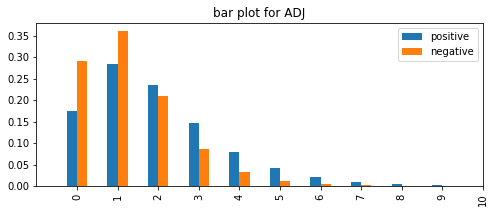

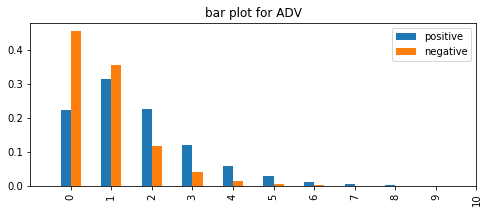

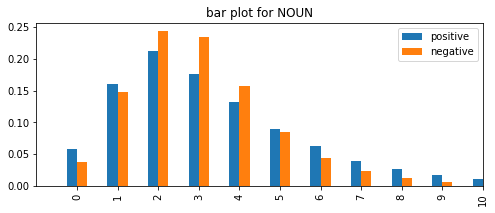

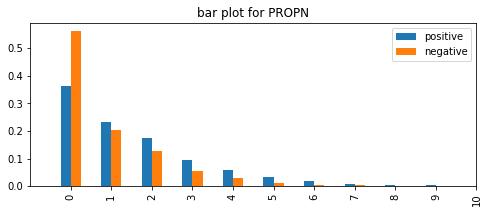

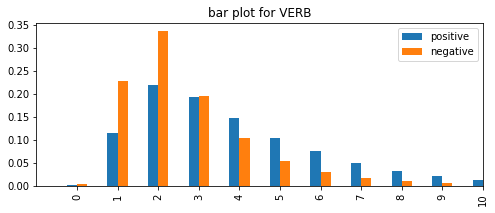

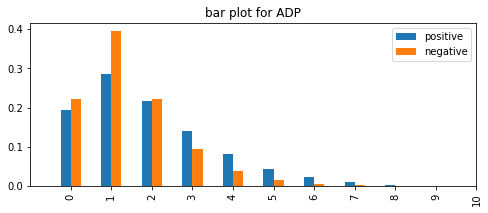

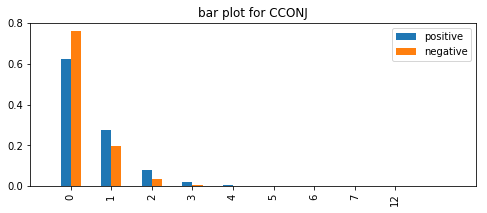

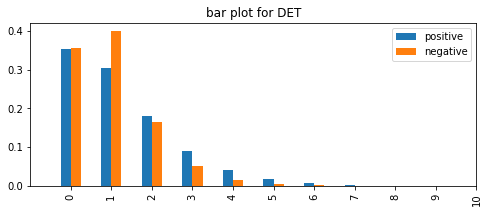

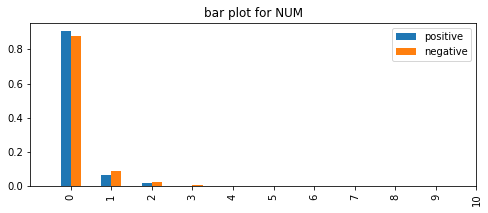

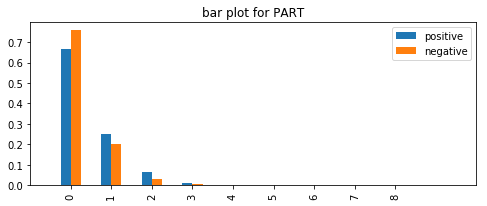

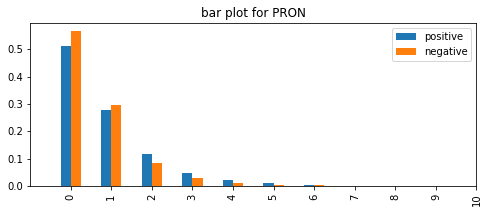

In [101]:
corpus_level_plot(normalized_count_dicts[2], 'bar')

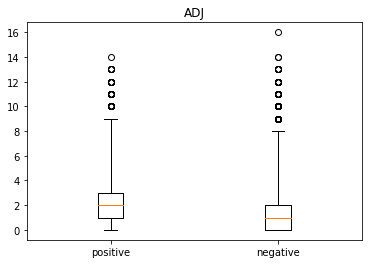

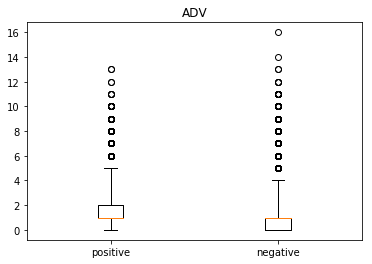

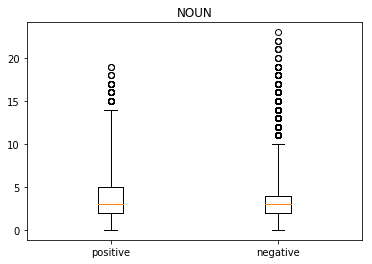

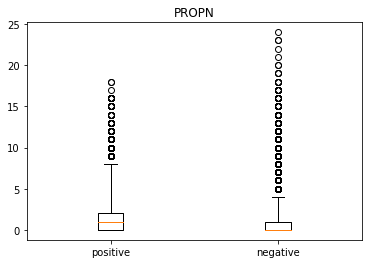

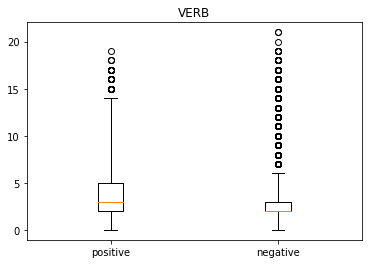

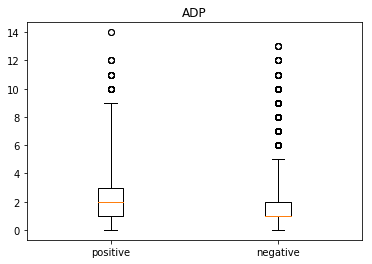

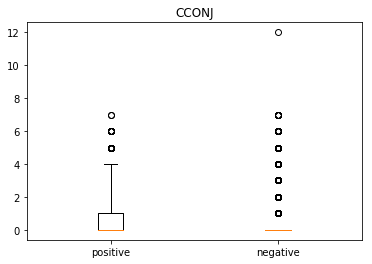

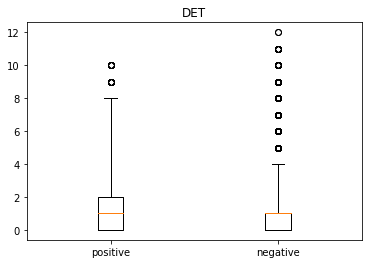

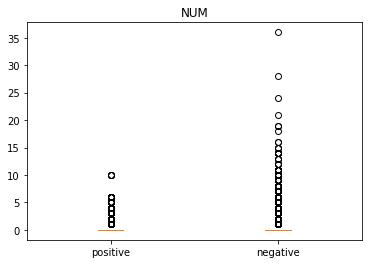

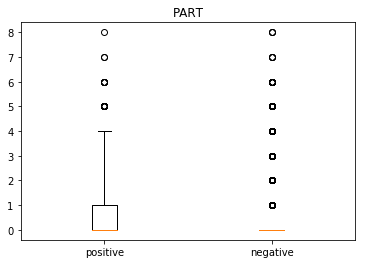

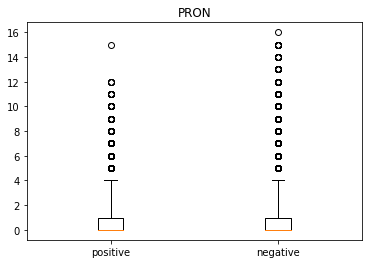

In [105]:
values = value_dicts[2]
for key in values:
    figure, ax = plt.subplots()
    labels, data = values[key].keys(), values[key].values()
    ax.boxplot(data, labels=labels, whis=3)
    ax.set_title(key)

In [46]:
def count_value(df):
    result = {}
    for key in df.columns:
        if key != 'all_punctuation' and key != 'target':
            result[key] = sum(df[key].values)
    return result

In [49]:
pos_punc_count = count_value(splitted_dfs[1][0])
neg_punc_count = count_value(splitted_dfs[1][1])

colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#adadeb']

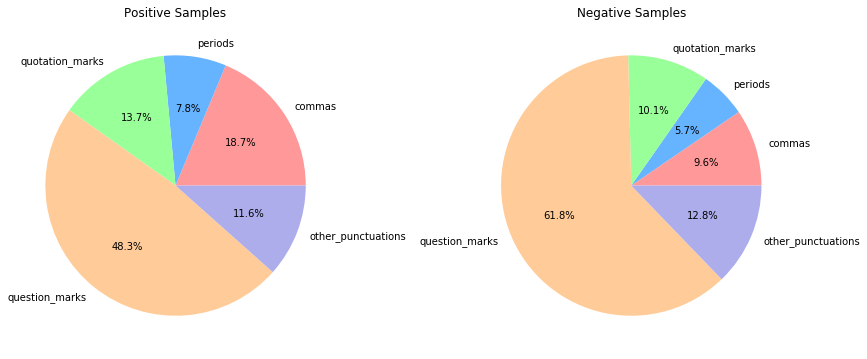

In [65]:
plt.figure('puncpiecharts', figsize=(14, 7))
plt.subplot(121, title='Positive Samples')
labels = list(pos_punc_count.keys())
counts = list(pos_punc_count.values())
plt.pie(counts, colors=colors, labels=labels, autopct='%1.1f%%')

plt.subplot(122, title='Negative Samples')
labels = list(neg_punc_count.keys())
counts = list(neg_punc_count.values())
plt.pie(counts, colors=colors, labels=labels, autopct='%1.1f%%')

plt.subplots_adjust(left = 0.125, 
                   right = 0.9, 
                   bottom = 0.1,
                   top = 0.9,
                   wspace = 0.4,
                   hspace = 0.2)